# When Will The Bubble Pop?: Predicting The Next Recession
Kamran, Leon, Atishya, Zoe

# Research Questions
+ What were the economic predictors of the 2008 financial crisis?
+ Does our current economy exhibit similar trends?

# Data 
+ 18 total data points
+ Quandl API 
    + Federal Reserve Economic Data (FRED)
    + Yale Department of Economics
+ "Income and Poverty in the United States: 2017" (CSV), US Census
+ National Student Loan Data System (CSV)
+ Consumer Credit Panel, New York Federal Reserve (CSV)

# Analysis

In [2]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl 
import requests
import json
import os
import csv

# Quandl API Keys

#Python API for FRED (Federal Reserve Economic Data) and ALFRED (Archival FRED)
from fredapi import Fred

# Household Median Income 

In [8]:
#Load CSV
file_to_load = "resource/TotalHousing.csv"
housing_data = pd.read_csv(file_to_load)

#Remove extraneous rows
update_housing_df=housing_data.drop(housing_data.index[19:52])

#Remove repeated rows
new_housing=update_housing_df.drop(update_housing_df.index[4])

#Check data types
new_housing.dtypes

new_housing.head()

,Year,Estimate
0,2017,61372
1,2016,60309
2,2015,58476
3,2014,55613
5,2013,54744


In [9]:
new_housing.describe()

,Year,Estimate
count,18.000000,18.000000
mean,2008.500000,57684.000000
std,5.338539,2014.550891
min,2000.000000,54569.000000
25%,2004.250000,55962.250000
50%,2008.500000,57911.000000
75%,2012.750000,58711.750000
max,2017.000000,61372.000000


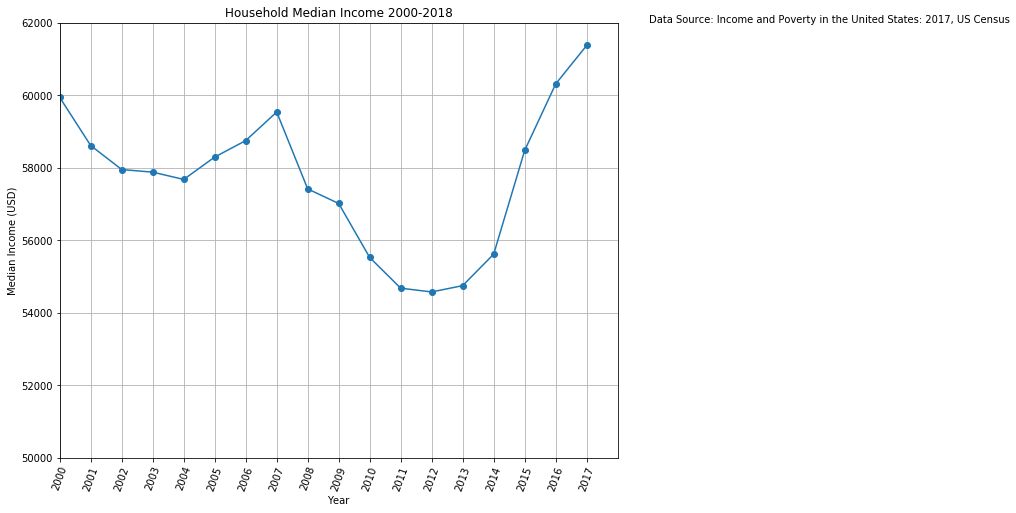

In [10]:
#Plot figure
plt.figure(figsize=(10,8))
x_axis=new_housing["Year"]
y_axis=new_housing["Estimate"]
plt.plot(x_axis,y_axis,marker="o")
plt.xlim(2000,2018)
plt.ylim(50000,62000)
plt.title("Household Median Income 2000-2018")
plt.xlabel("Year")
plt.ylabel("Median Income (USD)")
plt.xticks(rotation=70)
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1.0))
plt.grid()
plt.text(2019,62000, "Data Source: Income and Poverty in the United States: 2017, US Census")
plt.show()

+ The US economy was doing well up until 2007 when the recession hit
+ Drop in median household income due to recession
+ Also indicative of disproportionate distribution of income
+ Since 2012, the median income has increased which can be interpreted as a healthy economy

# S&P/Case-Shiller US National Home Price Index

In [11]:
#Pull data from API
data = fred.get_series('CSUSHPINSA', '1/1/2000', '1/10/2018')
data_df = pd.DataFrame(data)
data_df = data_df.reset_index()
data_df.columns = ['Year','Case Index']
data_df.head()

,Year,Case Index
0,2000-01-01,100.000
1,2000-02-01,100.570
2,2000-03-01,101.465
3,2000-04-01,102.541
4,2000-05-01,103.703


In [12]:
data_df.describe()

,Case Index
count,217.000000
mean,153.604687
std,24.713578
min,100.000000
25%,138.484000
50%,153.813000
75%,175.124000
max,196.413000


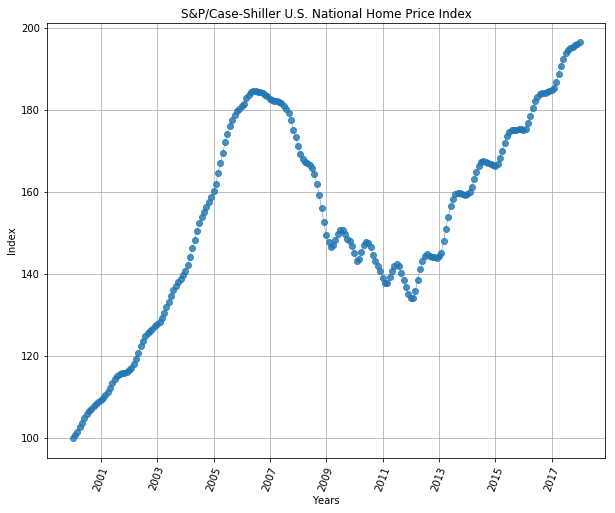

In [13]:
#Plot
plt.figure(figsize=(10,8))
x_axis=data_df["Year"]
y_axis=data_df["Case Index"]
plt.plot(x_axis,y_axis, marker="o", linewidth=0.5,alpha=0.8)
plt.title("S&P/Case-Shiller U.S. National Home Price Index")
plt.xlabel("Years")
plt.ylabel("Index")
plt.xticks(rotation=70)
plt.grid()
plt.show()

+ Accurate snapshot of the housing market that tracks the sale of homes 
    + Index measures changes in the prices of single-family homes
+ Since 2012, the trendline shows that prices are increasing exponentially, similar to median income